# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo SINASC_RO_2019.csv já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo estrutura_sinasc_para_CD.pdf (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 

Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis ['ESTCIVMAE', 'CONSULTAS'] possuem o código 9, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código 9.<br>
6. Substitua os valores faltantes da quantitativa (QTDFILVIVO) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção inplace = True.

In [24]:
import pandas as pd
import requests

# 1) seu código aqui
df = pd.read_csv('SINASC_RO_2019.csv', na_values=['na', ' ', None, 'NaN', 'na', 'etc', 'nan', 'NA', 'NAN'])
print(df.shape)
df.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)

In [25]:
# 2) seu código aqui
#Conte o número de valores missing por variável.
df.isna().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

In [26]:
# 3) seu código aqui
#Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis,
#muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
#['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
#    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'
df = df[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO','GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']]
df

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
...,...,...,...,...,...,...,...,...,...
27023,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0
27024,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0
27025,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
27026,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0


In [27]:
# 4) seu código aqui
#Apgar é uma nota que o pediatra dá ao bebê quando nasce de acordo com algumas
#características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento.
#Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. 
#Para esta seleção, conte novamente o número de linhas e o número de missings.
df['APGAR5'].dropna() #apagando os dados NA da coluna APGAR5

0        10.0
1         9.0
2        10.0
3        10.0
4        10.0
         ... 
27023     9.0
27024     9.0
27025    10.0
27026     9.0
27027     8.0
Name: APGAR5, Length: 26925, dtype: float64

In [28]:
df['APGAR5'].shape #n° linhas da coluna apgar 5

(27028,)

In [29]:
df['APGAR5'].isna().sum() # contando a quantidade de linhas missing

103

In [30]:
# 5) seu código aqui
#observe que as variáveis ['ESTCIVMAE', 'CONSULTAS'] possuem o código 9, que significa ignorado. 
#Vamos assumir que o não preenchido é o mesmo que o código 9.
df['ESTCIVMAE'].value_counts().sort_index()

ESTCIVMAE
1.0    8952
2.0    9924
3.0      57
4.0     453
5.0    7180
9.0     145
Name: count, dtype: int64

In [31]:
df['CONSULTAS'].value_counts().sort_index()

CONSULTAS
1      986
2     1379
3     5988
4    18624
9       51
Name: count, dtype: int64

In [32]:
df.loc[(df['ESTCIVMAE'] == 9) & (df['CONSULTAS'] == 9), ['ESTCIVMAE', 'CONSULTAS']] = ''
df

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
...,...,...,...,...,...,...,...,...,...
27023,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0
27024,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0
27025,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
27026,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0


In [33]:
df['ESTCIVMAE'].value_counts().sort_index()

ESTCIVMAE
1.0    8952
2.0    9924
3.0      57
4.0     453
5.0    7180
9.0     145
Name: count, dtype: int64

In [34]:
df['CONSULTAS'].value_counts().sort_index()

CONSULTAS
1      986
2     1379
3     5988
4    18624
9       51
Name: count, dtype: int64

In [35]:
# 6) Seu código aqui
#Substitua os valores faltantes da quantitativa (QTDFILVIVO) por zero.
df['QTDFILVIVO'].isna().sum()

1573

In [36]:
df.loc[(df['QTDFILVIVO'] == ' '), ['QTDFILVIVO']] = 0
df

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
...,...,...,...,...,...,...,...,...,...
27023,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0
27024,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0
27025,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
27026,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0


In [37]:
df['QTDFILVIVO'].isna().sum()

1573

In [38]:
# 7) seu código aqui
#Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha.
#Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento
#- não há necessariamente certo e errado aqui.
df_restante = df[['LOCNASC', 'IDADEMAE', 'ESCMAE' ,'GESTACAO', 'GRAVIDEZ']]
df_restante

,LOCNASC,IDADEMAE,ESCMAE,GESTACAO,GRAVIDEZ
0,1,19,8 a 11 anos,37 a 41 semanas,Única
1,1,29,8 a 11 anos,37 a 41 semanas,Única
2,1,37,8 a 11 anos,37 a 41 semanas,Única
3,1,30,12 anos ou mais,37 a 41 semanas,Única
4,1,30,8 a 11 anos,37 a 41 semanas,Única
...,...,...,...,...,...
27023,1,32,12 anos ou mais,32 a 36 semanas,Única
27024,1,19,8 a 11 anos,37 a 41 semanas,Única
27025,1,24,8 a 11 anos,37 a 41 semanas,Única
27026,1,21,8 a 11 anos,32 a 36 semanas,Única


In [39]:
df.dtypes

LOCNASC         int64
IDADEMAE        int64
ESTCIVMAE      object
ESCMAE         object
QTDFILVIVO    float64
GESTACAO       object
GRAVIDEZ       object
CONSULTAS      object
APGAR5        float64
dtype: object

In [40]:
df['ESTCIVMAE'].value_counts()

ESTCIVMAE
2.0    9924
1.0    8952
5.0    7180
4.0     453
9.0     145
3.0      57
Name: count, dtype: int64

In [41]:
df['ESTCIVMAE'].isna().sum()

317

Há 26711 linhas respondidas, mas o que me chamou atenção é que há 7180 votos em 5.0 sendo que essa opção nem existe essa opção no dicionário, isso corresponde à cerca de 26.88% dos dados respondidos. Somando esses valores com os 147 que marcaram a opção 9 mais os 317 campos nulos. O percentual dos nulos ficaria em 28,61%, proximo à um terço da coluna o que tornaria os dados não confiáveis.

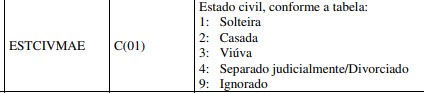

In [42]:
df['GRAVIDEZ'].isna().sum()

79

In [43]:
df['GRAVIDEZ'].dropna().value_counts()

GRAVIDEZ
Única              26452
Dupla                492
Tríplice e mais        5
Name: count, dtype: int64

Há 26949 registros na coluna 'Gravidez' sendo que dos 79 dados nulos equivalem à 0,2% do total, ou seja a remoção deles não impactaria no restante da analise.

In [44]:
# 8) seu código aqui
#O Apgar possui uma classificação indicando se o bebê passou por asfixia:
#Entre 8 e 10 está em uma faixa 'normal'.
#Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'.
#Entre 4 e 5 significa 'asfixia moderada'.
#Entre 0 e 3 significa 'asfixia severa'.
#Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.
df.loc[(df['APGAR5']>=8) & (df['APGAR5']<=10),'CATEGORIA'] = 'normal'
df.loc[(df['APGAR5']>=6) & (df['APGAR5']<=7), 'CATEGORIA'] = 'asfixia leve'
df.loc[(df['APGAR5']>=4) & (df['APGAR5']<=5), 'CATEGORIA'] = 'asfixia moderada'
df.loc[(df['APGAR5']>=0) & (df['APGAR5']<=3), 'CATEGORIA'] = 'asfixia moderada'
df

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,CATEGORIA
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,normal
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,normal
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,normal
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,normal
...,...,...,...,...,...,...,...,...,...,...
27023,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0,normal
27024,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0,normal
27025,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal
27026,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0,normal


In [45]:
df['CATEGORIA'].value_counts()

CATEGORIA
normal              26463
asfixia leve          320
asfixia moderada      142
Name: count, dtype: int64

In [46]:
# 9) seu código aqui
#Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras.
#Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção ```inplace = True```.
df['CATEGORIA'] = df['CATEGORIA'].str.replace(' ', '_').str.lower()
df

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,CATEGORIA
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,normal
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,normal
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,normal
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,normal
...,...,...,...,...,...,...,...,...,...,...
27023,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0,normal
27024,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0,normal
27025,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal
27026,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0,normal


In [47]:
df['CATEGORIA'].value_counts()

CATEGORIA
normal              26463
asfixia_leve          320
asfixia_moderada      142
Name: count, dtype: int64